# Covid-19 Prediction from symptoms 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url = "https://res.cloudinary.com/dqlh9q2iv/raw/upload/v1615878005/coviddataset_o6x2kb.csv"
raw_data = pd.read_csv(url,sep=",")
raw_data

,Unnamed: 0,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2020-04-17,0,0,0,0,0,negative,None,female,Other
99996,99996,2020-04-17,0,0,0,0,0,negative,None,male,Other
99997,99997,2020-04-17,0,0,0,0,0,negative,None,female,Other
99998,99998,2020-04-17,0,0,0,0,0,negative,None,male,Other


In [2]:
raw_data.columns

Index(['Unnamed: 0', 'test_date', 'cough', 'fever', 'sore_throat',
       'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above',
       'gender', 'test_indication'],
      dtype='object')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           100000 non-null  int64 
 1   test_date            100000 non-null  object
 2   cough                100000 non-null  int64 
 3   fever                100000 non-null  int64 
 4   sore_throat          100000 non-null  int64 
 5   shortness_of_breath  100000 non-null  int64 
 6   head_ache            100000 non-null  int64 
 7   corona_result        100000 non-null  object
 8   age_60_and_above     100000 non-null  object
 9   gender               100000 non-null  object
 10  test_indication      100000 non-null  object
dtypes: int64(6), object(5)
memory usage: 8.4+ MB


In [4]:
raw_data.drop(["Unnamed: 0"],axis=1,inplace=True)
raw_data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
99995,2020-04-17,0,0,0,0,0,negative,None,female,Other
99996,2020-04-17,0,0,0,0,0,negative,None,male,Other
99997,2020-04-17,0,0,0,0,0,negative,None,female,Other
99998,2020-04-17,0,0,0,0,0,negative,None,male,Other


### Exploratory Data Analysis 

In [5]:
raw_data['cough'].value_counts()

0    89273
1    10727
Name: cough, dtype: int64

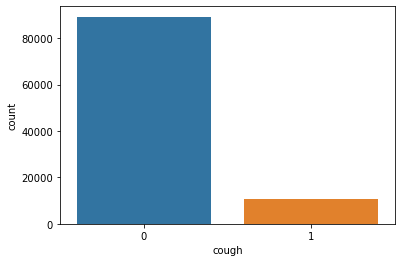

In [6]:
sns.countplot(raw_data['cough'])

In [7]:
raw_data['fever'].value_counts()

0    94417
1     5583
Name: fever, dtype: int64

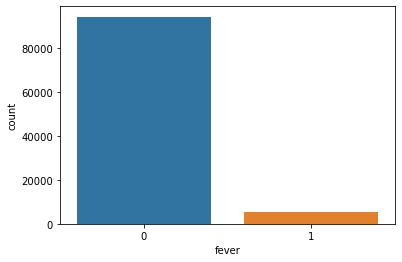

In [8]:
sns.countplot(raw_data['fever'])

In [9]:
raw_data['sore_throat'].value_counts()

0    99982
1       18
Name: sore_throat, dtype: int64

In [10]:
raw_data['shortness_of_breath'].value_counts()

0    99985
1       15
Name: shortness_of_breath, dtype: int64

In [11]:
raw_data['head_ache'].value_counts()

0    99982
1       18
Name: head_ache, dtype: int64

In [12]:
raw_data['corona_result'].value_counts()

negative    96492
positive     2309
other        1199
Name: corona_result, dtype: int64

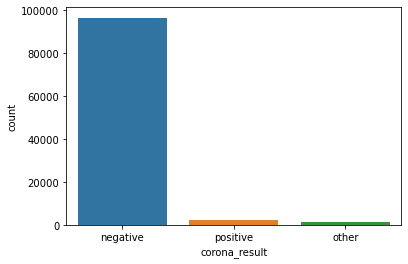

In [13]:
sns.countplot(raw_data['corona_result'])

In [14]:
raw_data['age_60_and_above'].value_counts()

None    100000
Name: age_60_and_above, dtype: int64

In [15]:
raw_data.drop(["age_60_and_above"],axis=1,inplace=True)

In [16]:
raw_data['gender'].value_counts()

female    49956
male      48386
None       1658
Name: gender, dtype: int64

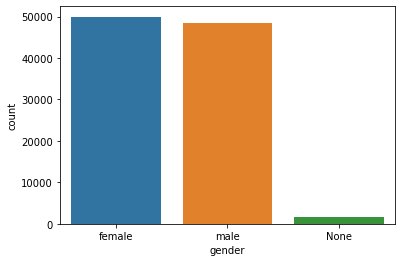

In [17]:
sns.countplot(raw_data['gender'])

In [18]:
raw_data['test_indication'].value_counts()

Other                     91801
Abroad                     6512
Contact with confirmed     1687
Name: test_indication, dtype: int64

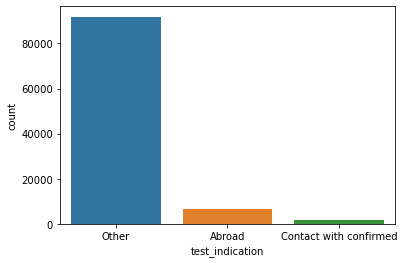

In [19]:
sns.countplot(raw_data['test_indication'])

In [20]:
raw_data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.107270,0.055830,0.000180,0.000150,0.000180
std,0.309458,0.229594,0.013415,0.012247,0.013415
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
corr = raw_data.corr()
corr

,cough,fever,sore_throat,shortness_of_breath,head_ache
cough,1.000000,0.458713,0.026664,0.027418,0.026664
fever,0.458713,1.000000,0.022711,0.018361,0.025958
sore_throat,0.026664,0.022711,1.000000,0.304176,0.277648
shortness_of_breath,0.027418,0.018361,0.304176,1.000000,0.243308
head_ache,0.026664,0.025958,0.277648,0.243308,1.000000


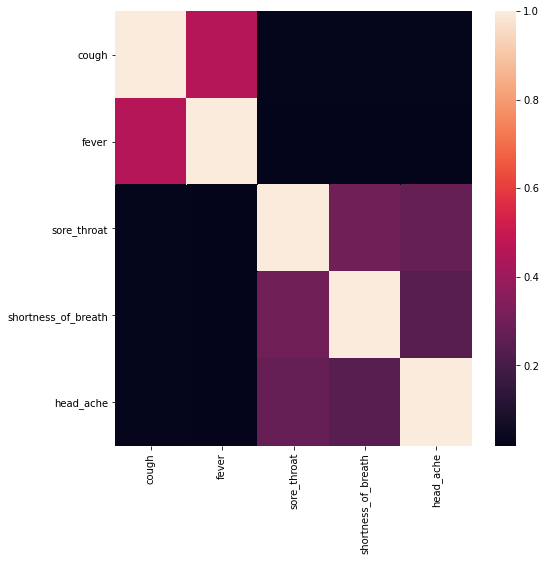

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(corr)

### Model Designing 

In [23]:
raw_data['corona_result']

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
99995    negative
99996    negative
99997    negative
99998    negative
99999    negative
Name: corona_result, Length: 100000, dtype: object

In [24]:
raw_data['corona_result'] = raw_data['corona_result'].map({'negative':0,'positive':1,'other':1})

In [25]:
raw_data['corona_result']

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: corona_result, Length: 100000, dtype: int64

In [26]:
raw_data['corona_result'].value_counts()

0    96492
1     3508
Name: corona_result, dtype: int64

In [27]:
raw_data['gender'].unique()

array(['female', 'male', 'None'], dtype=object)

In [28]:
raw_data['gender'] = raw_data['gender'].map({'female':0,'male':1,'None':2})

In [29]:
raw_data['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [30]:
raw_data['test_indication'] = raw_data['test_indication'].map({'Contact with confirmed':0,'Abroad':1,'Other':2})

In [31]:
raw_data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,2020-04-30,0,0,0,0,0,0,0,2
1,2020-04-30,1,0,0,0,0,0,0,2
2,2020-04-30,0,1,0,0,0,0,1,2
3,2020-04-30,1,0,0,0,0,0,0,2
4,2020-04-30,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
99995,2020-04-17,0,0,0,0,0,0,0,2
99996,2020-04-17,0,0,0,0,0,0,1,2
99997,2020-04-17,0,0,0,0,0,0,0,2
99998,2020-04-17,0,0,0,0,0,0,1,2


In [32]:
X = raw_data.drop(["test_date","corona_result"],axis=1)
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,test_indication
0,0,0,0,0,0,0,2
1,1,0,0,0,0,0,2
2,0,1,0,0,0,1,2
3,1,0,0,0,0,0,2
4,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,2
99996,0,0,0,0,0,1,2
99997,0,0,0,0,0,0,2
99998,0,0,0,0,0,1,2


In [33]:
y = raw_data['corona_result']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: corona_result, Length: 100000, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)   
X_test = ss.transform(X_test)

## Machine Learning Models 

### 1. Decision Tree Classifier 

In [36]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of Decision Tree Classifier is:  97.50666666666666


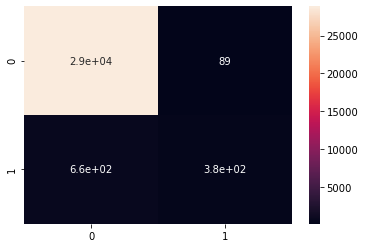

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Percentile Accuracy of Decision Tree Classifier is: ", accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [39]:
results = pd.DataFrame() 
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Classifier'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067


### 2. Random Forest Classifier 

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="gini",n_estimators = 1000,random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [41]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of Random Forest Classifier is:  97.50666666666666


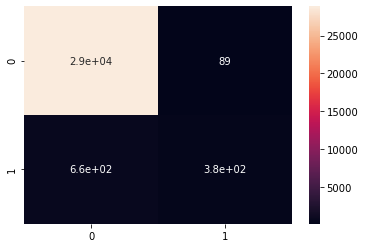

In [42]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Random Forest Classifier is: ",accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [43]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067


# 3.k- NN


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [45]:
predicted= knn.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of k- NN is:  97.35666666666667


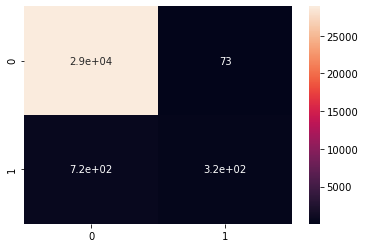

In [46]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of k- NN is: ",accuracy_score(y_test, predicted)*100)
sns.heatmap(data = confusion_matrix(y_test,predicted),annot = True)

In [47]:
tempResults = pd.DataFrame({'Algorithm':['kNN'], 'Accuracy':[accuracy_score(y_test, predicted)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567


# 4.K Means

In [48]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X_train,y_train)


KMeans(n_clusters=3, random_state=0)

In [49]:
predicted= k_means.predict(X_test)
predicted

array([1, 1, 0, ..., 1, 0, 1])

Percentile Accuracy of K Means is:  9.823333333333334


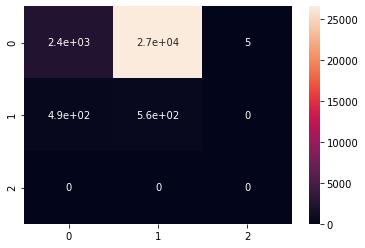

In [50]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of K Means is: ",accuracy_score(y_test, predicted)*100)
sns.heatmap(data = confusion_matrix(y_test,predicted),annot = True)

In [51]:
tempResults = pd.DataFrame({'Algorithm':['k-Means'], 'Accuracy':[accuracy_score(y_test, predicted)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567
0,k-Means,0.098233


# 5.SVM


In [52]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)
model.score(X_train,y_train)

0.9742857142857143

In [53]:
predicted= model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of SVM is:  97.51333333333334


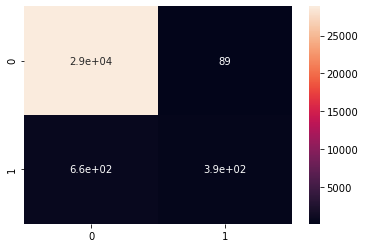

In [54]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of SVM is: ",accuracy_score(y_test, predicted)*100)
sns.heatmap(data = confusion_matrix(y_test,predicted),annot = True)

In [55]:
tempResults = pd.DataFrame({'Algorithm':['SVM'], 'Accuracy':[accuracy_score(y_test, predicted)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567
0,k-Means,0.098233
0,SVM,0.975133


# 6.Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100,learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [57]:
predicted= model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of Gradient and AdaBoost is:  96.52


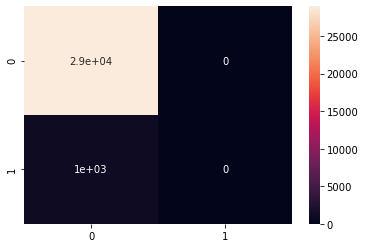

In [58]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Gradient and AdaBoost is: ",accuracy_score(y_test, predicted)*100)
sns.heatmap(data = confusion_matrix(y_test,predicted),annot = True)

In [59]:
tempResults = pd.DataFrame({'Algorithm':['Gradient and AdaBoost'], 'Accuracy':[accuracy_score(y_test, predicted)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567
0,k-Means,0.098233
0,SVM,0.975133
0,Gradient and AdaBoost,0.965200


# 7.Naive Bayes


In [60]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [61]:
predicted= model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of Naive Bayes is:  95.42


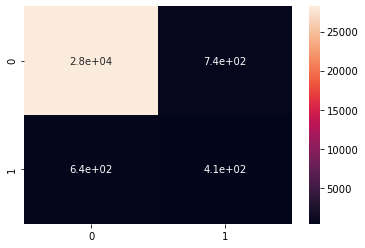

In [62]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Naive Bayes is: ",accuracy_score(y_test, predicted)*100)
sns.heatmap(data = confusion_matrix(y_test,predicted),annot = True)

In [63]:
tempResults = pd.DataFrame({'Algorithm':['Naive Bayes'], 'Accuracy':[accuracy_score(y_test, predicted)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567
0,k-Means,0.098233
0,SVM,0.975133
0,Gradient and AdaBoost,0.965200
0,Naive Bayes,0.954200


# 8.Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [[-0.17356653 -0.00388287 -0.02566043  0.02511948  0.01332441  0.06758357
  -0.8039    ]]
Intercept: 
 [-3.7640889]


In [65]:
predicted= model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of Logisitic Regression is:  97.41666666666666


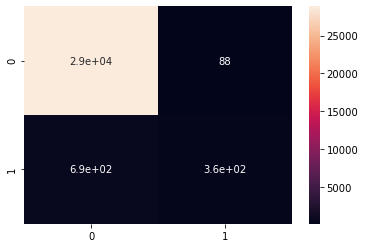

In [66]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Logisitic Regression is: ",accuracy_score(y_test, predicted)*100)
sns.heatmap(data = confusion_matrix(y_test,predicted),annot = True)

In [67]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'], 'Accuracy':[accuracy_score(y_test, predicted)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567
0,k-Means,0.098233
0,SVM,0.975133
0,Gradient and AdaBoost,0.965200
0,Naive Bayes,0.954200
0,Logistic Regression,0.974167


# Deep Learning Models

## 1.Single Layered Perceptron

In [68]:
from sklearn.linear_model import Perceptron
slf=Perceptron(tol=1e-1,random_state=0,alpha=0.0025)
slf.fit(X_train,y_train)

Perceptron(alpha=0.0025, tol=0.1)

In [69]:
y_pred=slf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of Single Layered Perceptron is:  96.52


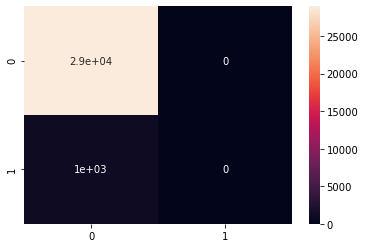

In [70]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Single Layered Perceptron is: ",accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [71]:
tempResults = pd.DataFrame({'Algorithm':['Single Layered Perceptron'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567
0,k-Means,0.098233
0,SVM,0.975133
0,Gradient and AdaBoost,0.965200
0,Naive Bayes,0.954200
0,Logistic Regression,0.974167
0,Single Layered Perceptron,0.965200


## 2. Multi Layered Perceptron

In [72]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,128),max_iter=400,random_state=0)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=400, random_state=0)

In [73]:
y_pred=mlp.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Percentile Accuracy of Multi Layered Perceptron is:  97.50999999999999


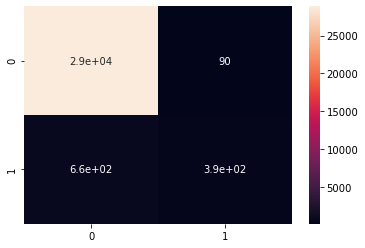

In [74]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Multi Layered Perceptron is: ",accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [75]:
tempResults = pd.DataFrame({'Algorithm':['Multi Layered Perceptron'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.975067
0,Random Forest Classifier Method,0.975067
0,kNN,0.973567
0,k-Means,0.098233
0,SVM,0.975133
0,Gradient and AdaBoost,0.965200
0,Naive Bayes,0.954200
0,Logistic Regression,0.974167
0,Single Layered Perceptron,0.965200
0,Multi Layered Perceptron,0.975100
